## Importing Essential Libraries and reading the CSV files

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'E:\Learning Data Science With Python\Data Science 103 - Exploratory Data Analysis\Cuisine_rating.csv')

## Checking the data, data types, for better understanding

In [22]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


## Doing a bit of data cleaning

In [24]:
df.drop(columns = ['User ID'], inplace=True)

In [25]:
for i in df['Location']:
    df['Location'] = df['Location'].replace('nY', 'NY', regex=True)
    df['Location'] = df['Location'].replace('ny', 'NY', regex=True)
    df['Location'] = df['Location'].replace('MY', 'NY', regex=True)

In [26]:
df.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


## Exploratory Data Analysis

In [27]:
df['Area code'].unique()

array([153, 123, 122, 129, 111, 107, 154, 117, 192, 137, 121, 198, 172,
       188, 166, 124, 131, 149, 101, 104, 140, 145, 159, 195, 105, 130,
       139, 113, 127, 134, 148, 158, 161, 167, 176, 110, 120, 142, 162,
       173, 184, 199, 102, 106, 157, 185, 147, 183, 138, 136, 169, 196,
       175, 135, 125, 186, 194, 182, 197, 179, 163, 178, 103, 170, 160],
      dtype=int64)

### 1) Visualizing the frequency of users from each location.

* The dataset has people visiting from different locations across New York.
* We will use a bar plot to identify how many people have come from each unique location.

In [28]:
df['Location'].unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Cedar Hill, NY'], dtype=object)

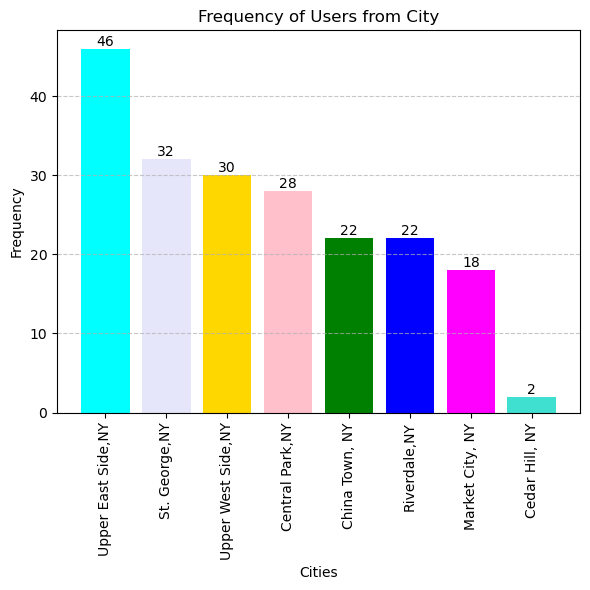

In [29]:
plt.figure(figsize=(6,6))

plt.bar(df['Location'].unique(), df['Location'].value_counts(), color=['Cyan','Lavender','Gold','Pink','Green','Blue','Magenta','Turquoise','Violet','Yellow'])

for location, value in zip(df['Location'].unique(), df['Location'].value_counts()):
    plt.text(location, value, str(value), ha='center', va='bottom')
    
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.title('Frequency of Users from City')

plt.xticks(rotation=90)
plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### 2) Visualizing the frequency of gender visiting the store.

* The dataset has different genders visitng the store.
* We will use a pie chart to see the gender distribution.

In [30]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

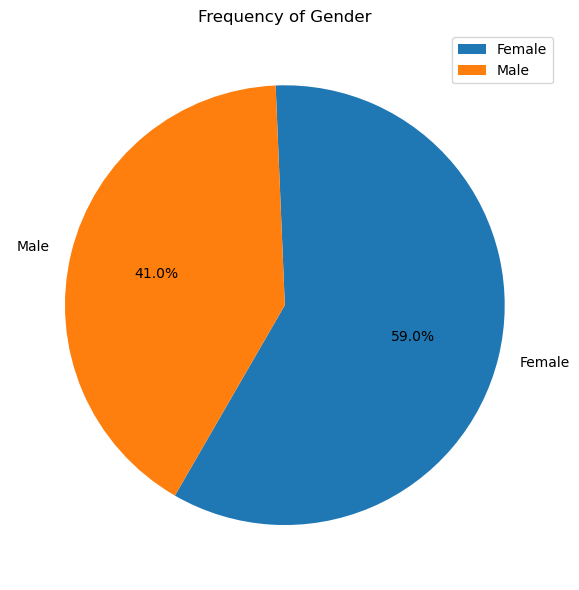

In [31]:
plt.figure(figsize=(6,6))

plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%', startangle=240)

plt.title('Frequency of Gender')

plt.legend(loc='best')

plt.tight_layout()
plt.show()

### 3) Visualizing the Distribution of Year of Birth.

* The Customers at the store have a wide range of YOB.
* We will identify how the Year of Birth is distributed.

In [32]:
df['YOB'].unique()

array([2006, 1991, 1977, 1956, 1997, 1995, 2003, 1965, 1975, 1963, 1980,
       2007, 2004, 2001, 1959, 2009, 1983, 1971, 1974, 1969, 2000, 1988,
       1999, 1998, 1990, 1987, 1986, 1967, 1985, 1976, 2005, 1989, 1958,
       1981, 1962, 1964, 1955, 2002, 1996, 1961, 1957, 1994, 1979, 1978,
       1960, 1982], dtype=int64)

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_14448\2168177886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YOB'])


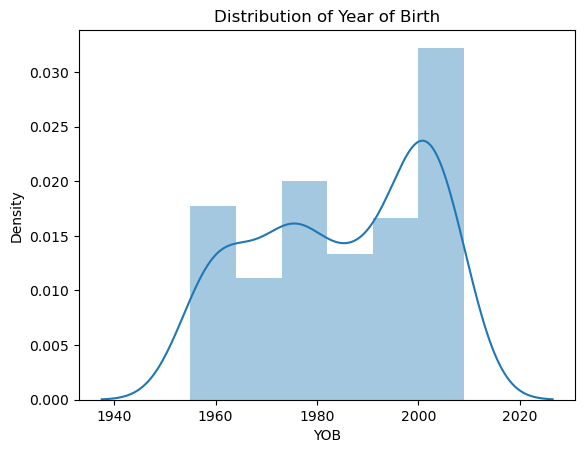

In [33]:
sns.distplot(df['YOB'])
plt.title('Distribution of Year of Birth')
plt.show()

### 4) Visualizing the frequency of married/unmarried people visiting the store.

* The dataset has people of different marital status visitng the store.
* We will use a pie chart to see the marital status distribution.

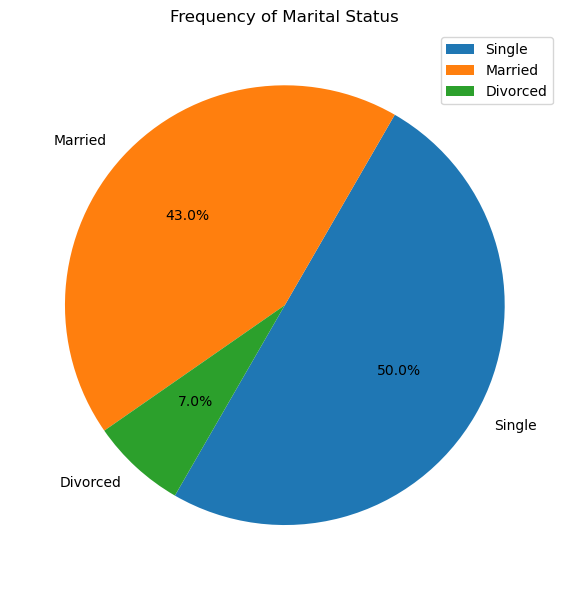

In [34]:
plt.figure(figsize=(6,6))

plt.pie(df['Marital Status'].value_counts(), labels=df['Marital Status'].unique(), autopct='%1.1f%%', startangle=240)

plt.title('Frequency of Marital Status')

plt.legend(loc='best')

plt.tight_layout()
plt.show()

### 5) Visualizing the frequency of the different professional status of people visiting the store.

* The dataset has people of different professional status visitng the store.
* We will use a pie chart to see the professional status distribution.

In [35]:
df['Activity'].unique()

array(['Professional', 'Student'], dtype=object)

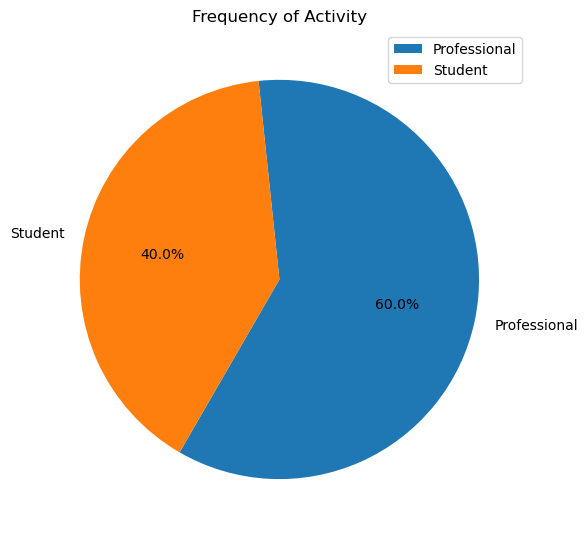

In [36]:
plt.figure(figsize=(6,6))

plt.pie(df['Activity'].value_counts(), labels=df['Activity'].unique(), autopct='%1.1f%%', startangle=240)

plt.title('Frequency of Activity')

plt.legend(loc='best')

plt.tight_layout()
plt.show()

### 6) Visualizing the Distribution of Budget.

* The Customers at the store have different budgets.
* We will identify how the Budgets are distributed.

In [37]:
df['Budget'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_14448\709802373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Budget'])


<Axes: xlabel='Budget', ylabel='Density'>

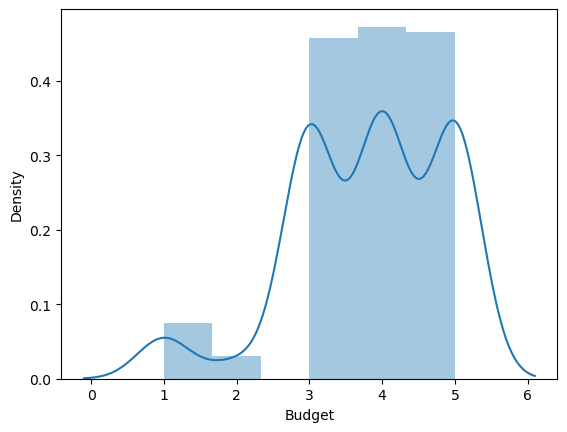

In [38]:
sns.distplot(df['Budget'])

### Visualizing the frequency of the Budget of the Users.

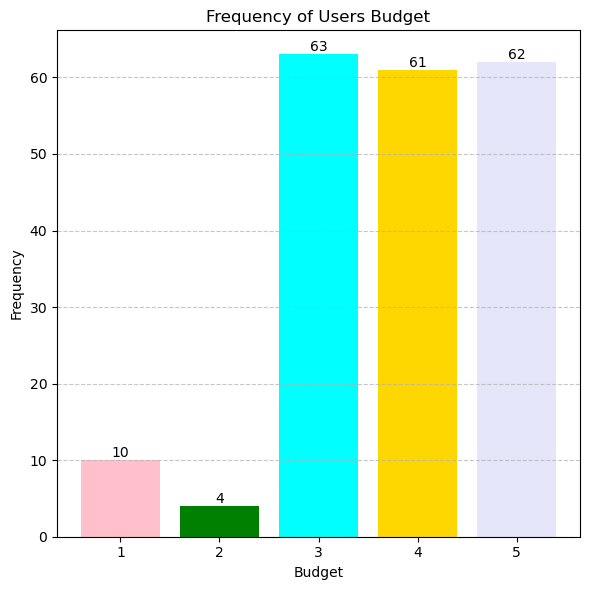

In [39]:
plt.figure(figsize=(6,6))

plt.bar(df['Budget'].unique(), df['Budget'].value_counts(), color=['Cyan','Lavender','Gold','Pink','Green'])

for budget, value in zip(df['Budget'].unique(), df['Budget'].value_counts()):
    plt.text(budget, value, str(value), ha='center', va='bottom')
    
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Frequency of Users Budget')

# plt.xticks(rotation=90)
plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### 7) Visualizing the frequency of users preference of Cuisines.

* The dataset has people that prefer different cuisines.
* We will use a bar plot to identify how many people prefer each cuisine.

In [40]:
df['Cuisines'].unique()

array(['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese',
       'French'], dtype=object)

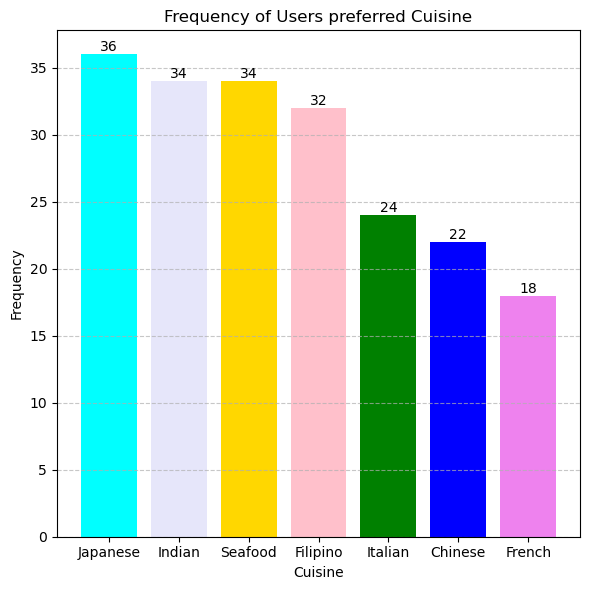

In [41]:
plt.figure(figsize=(6,6))

plt.bar(df['Cuisines'].unique(), df['Cuisines'].value_counts(), color=['Cyan','Lavender','Gold','Pink','Green', 'Blue', 'Violet'])

for cuisine, value in zip(df['Cuisines'].unique(), df['Cuisines'].value_counts()):
    plt.text(cuisine, value, str(value), ha='center', va='bottom')
    
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.title('Frequency of Users preferred Cuisine')

# plt.xticks(rotation=90)
plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### 8) Visualizing the frequency of the Alcohol Consumers of people visiting the store.

* The dataset has people that consume/don't consume alcohol.
* We will use a pie chart to see the alcohol consumption percentages.

In [42]:
df['Alcohol '].unique()
df.rename(columns={'Alcohol ':'Alcohol'}, inplace=True)

In [43]:
df['Alcohol'].unique()

array(['Never', 'Often', 'Socially'], dtype=object)

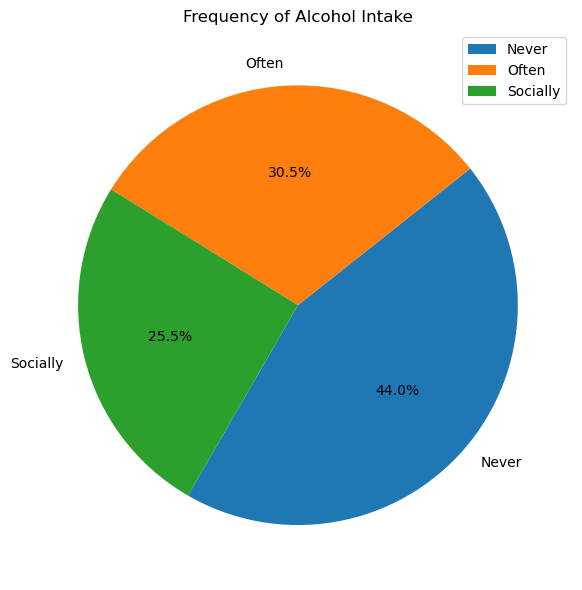

In [44]:
plt.figure(figsize=(6,6))

plt.pie(df['Alcohol'].value_counts(), labels=df['Alcohol'].unique(), autopct='%1.1f%%', startangle=240)

plt.title('Frequency of Alcohol Intake')

plt.legend(loc='best')

plt.tight_layout()
plt.show()

### 9) Visualizing the frequency of the Smokers of people visiting the store.

* The dataset has people that smoke/don't smoke.
* We will use a pie chart to see the smoker percentages.

In [45]:
df['Smoker'].unique()

array(['Never', 'Socially', 'Often'], dtype=object)

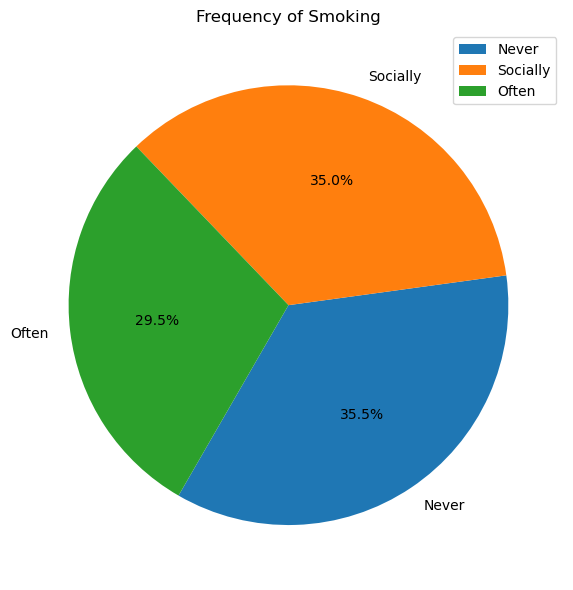

In [46]:
plt.figure(figsize=(6,6))

plt.pie(df['Smoker'].value_counts(), labels=df['Smoker'].unique(), autopct='%1.1f%%', startangle=240)

plt.title('Frequency of Smoking')

plt.legend(loc='best')

plt.tight_layout()
plt.show()

### 10) Visualizing the Distribution of Food Ratings.

* The Customers at the store give different food ratings.
* We will identify how the Food Ratings are distributed.

In [47]:
df['Food Rating'].unique()

array([5, 1, 3, 2, 4], dtype=int64)

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_14448\2572056173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Food Rating'])


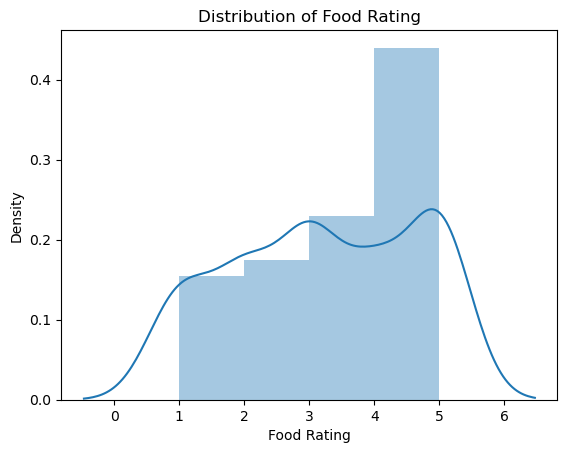

In [48]:
sns.distplot(df['Food Rating'])
plt.title('Distribution of Food Rating')
plt.show()

### 11) Visualizing the Distribution of Service Ratings.

* The Customers at the store give different service ratings.
* We will identify how the Service Ratings are distributed.

In [49]:
df['Service Rating'].unique()

array([4, 1, 5, 2, 3], dtype=int64)

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_14448\707085520.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Service Rating'])


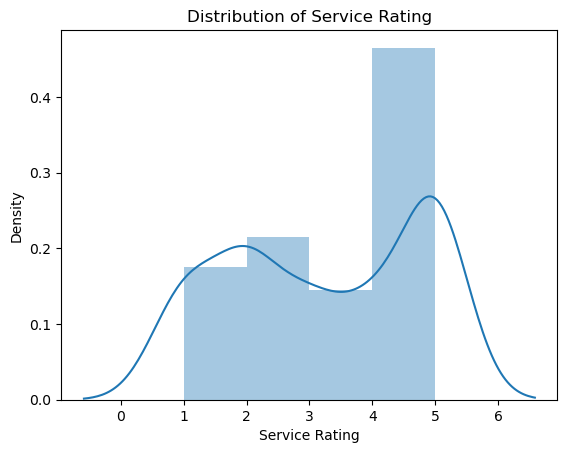

In [50]:
sns.distplot(df['Service Rating'])
plt.title('Distribution of Service Rating')
plt.show()

### 12) Visualizing the Distribution of Overall Ratings.

* The Customers at the store give different overall ratings.
* We will identify how the Overall Ratings are distributed.

In [51]:
df['Overall Rating'].unique()

array([4.5, 1. , 5. , 2. , 3. , 2.5, 3.5, 1.5, 4. ])

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_14448\4093142183.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Overall Rating'])


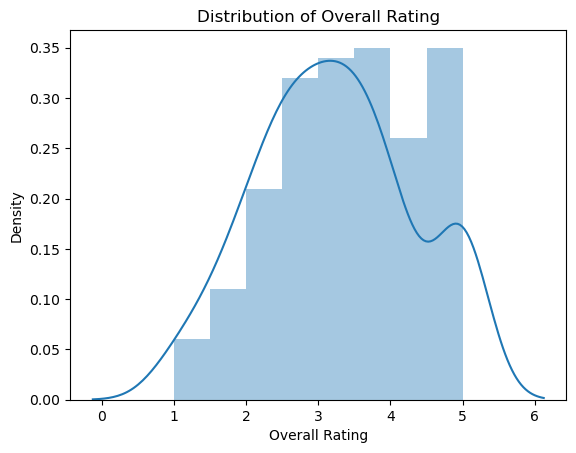

In [52]:
sns.distplot(df['Overall Rating'])
plt.title('Distribution of Overall Rating')
plt.show()

### 13) Visualizing the frequency of the people who visit often.

* The dataset has people that visit the store often.
* We will use a pie chart to see the distributed percentages.

In [53]:
df['Often A S'].unique()

array(['No', 'Yes'], dtype=object)

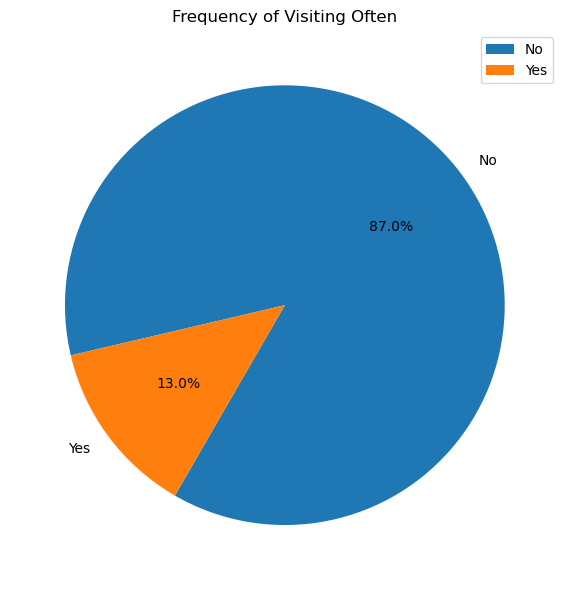

In [54]:
plt.figure(figsize=(6,6))

plt.pie(df['Often A S'].value_counts(), labels=df['Often A S'].unique(), autopct='%1.1f%%', startangle=240)

plt.title('Frequency of Visiting Often')

plt.legend(loc='best')

plt.tight_layout()
plt.show()

### 14) Visualizing how each gender rates different cuisines overall.

* To get a deeper understanding, we will now see how each gender rates each cuisine on average.
* We will group the data using the 'groupby' function, then use a barplot to visualize the data.

In [55]:
average_food_rating_across_cuisines = df.groupby(['Cuisines','Gender'])['Overall Rating'].mean().unstack()
print(average_food_rating_across_cuisines)

Gender      Female      Male
Cuisines                    
Chinese   3.321429  3.200000
Filipino  3.291667  2.909091
French    3.093750  3.111111
Indian    3.150000  3.181818
Italian   3.250000  3.083333
Japanese  3.821429  3.454545
Seafood   3.500000  3.055556


<Figure size 1000x1000 with 0 Axes>

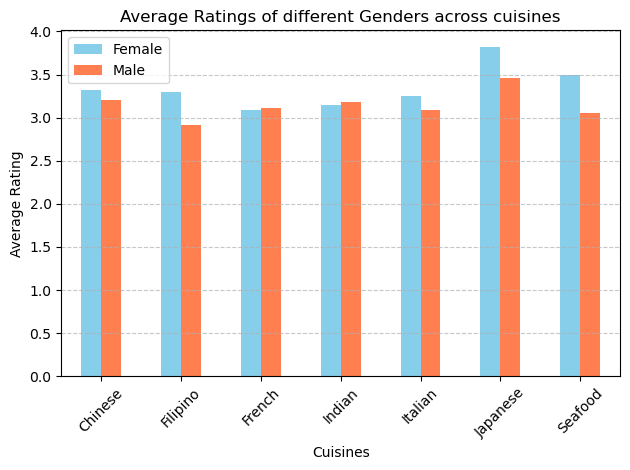

In [56]:
plt.figure(figsize=(10,10))

average_food_rating_across_cuisines.plot(kind='bar', color=['skyblue','coral'])

plt.legend(loc='best')

plt.xlabel('Cuisines')
plt.ylabel('Average Rating')
plt.title('Average Ratings of different Genders across cuisines')

plt.xticks(rotation = 45)

plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### 15) Visualizing how each alcohol consumption category rates overall.

* To get a deeper understanding, we will now see how each alcohol category rates the store on average.
* We will group the data using the 'groupby' function, then use a barplot to visualize the data.

In [57]:
average_overall_rating_across_alcoholics = df.groupby(['Alcohol'])['Overall Rating'].mean()

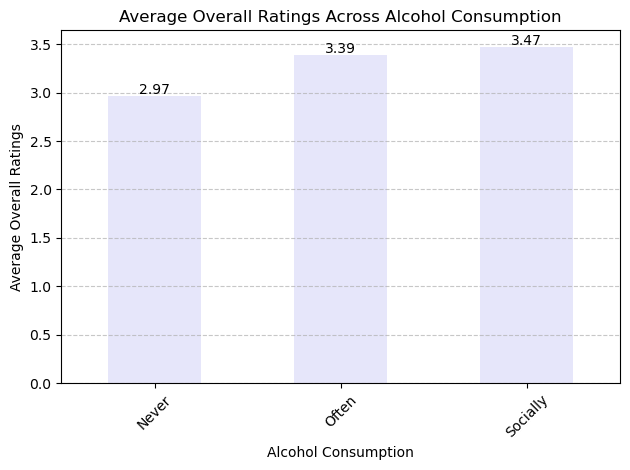

In [58]:
average_overall_rating_across_alcoholics.plot(kind='bar', color='Lavender')

plt.xlabel('Alcohol Consumption')
plt.ylabel('Average Overall Ratings')
plt.title('Average Overall Ratings Across Alcohol Consumption')

y_pos = average_overall_rating_across_alcoholics.values - 0.01

for index, value in enumerate(average_overall_rating_across_alcoholics):
    plt.text(index, y_pos[index], round(value, 2), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### 16) Visualizing how each smoke consumption category rates overall.

* To get a deeper understanding, we will now see how each smoker category rates the store on average.
* We will group the data using the 'groupby' function, then use a barplot to visualize the data.

In [59]:
average_overall_rating_across_smokers = df.groupby(['Smoker'])['Overall Rating'].mean()

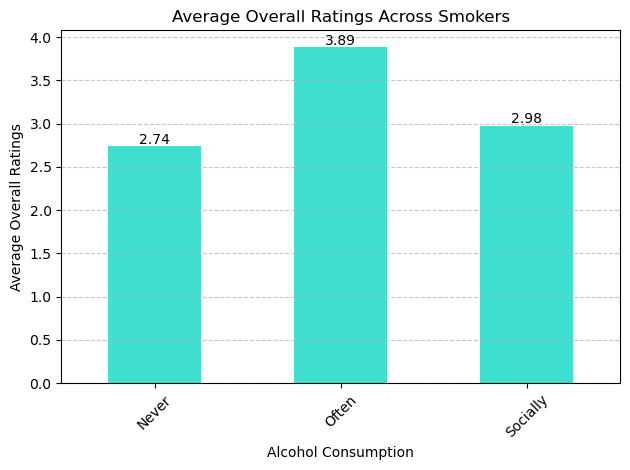

In [60]:
average_overall_rating_across_smokers.plot(kind='bar', color='Turquoise')

plt.xlabel('Alcohol Consumption')
plt.ylabel('Average Overall Ratings')
plt.title('Average Overall Ratings Across Smokers')

y_pos = average_overall_rating_across_smokers.values - 0.01

for index, value in enumerate(average_overall_rating_across_smokers):
    plt.text(index, y_pos[index], round(value, 2), ha='center', va='bottom')


# plt.legend(loc='best')

plt.xticks(rotation=45)

plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### 17) Visualizing how each marital status category rates overall.

* To get a deeper understanding, we will now see how each marital status category rates the store on average.
* We will group the data using the 'groupby' function, then use a barplot to visualize the data.

In [61]:
average_overall_rating_across_married_people = df.groupby(['Marital Status'])['Overall Rating'].mean()

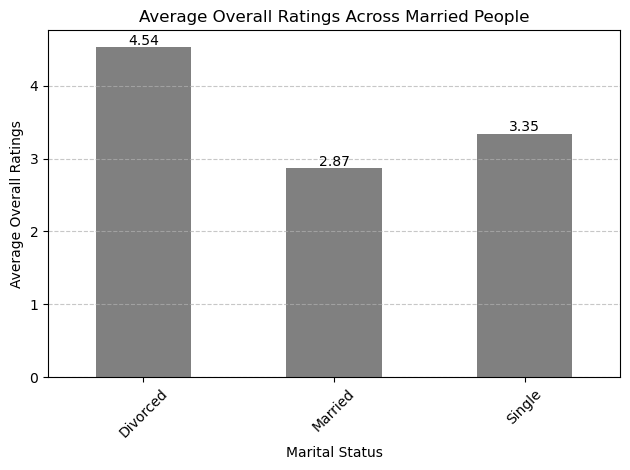

In [62]:
average_overall_rating_across_married_people.plot(kind='bar', color='Grey')

plt.xlabel('Marital Status')
plt.ylabel('Average Overall Ratings')
plt.title('Average Overall Ratings Across Married People')

y_pos = average_overall_rating_across_married_people.values - 0.01

for index, value in enumerate(average_overall_rating_across_married_people):
    plt.text(index, y_pos[index], round(value, 2), ha='center', va='bottom')


# plt.legend(loc='best')

plt.xticks(rotation=45)

plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### 18) Visualizing how each activity category rates overall.

* To get a deeper understanding, we will now see how each activity category rates the store on average.
* We will group the data using the 'groupby' function, then use a barplot to visualize the data.

In [63]:
average_overall_rating_across_activity = df.groupby(['Activity'])['Overall Rating'].mean()

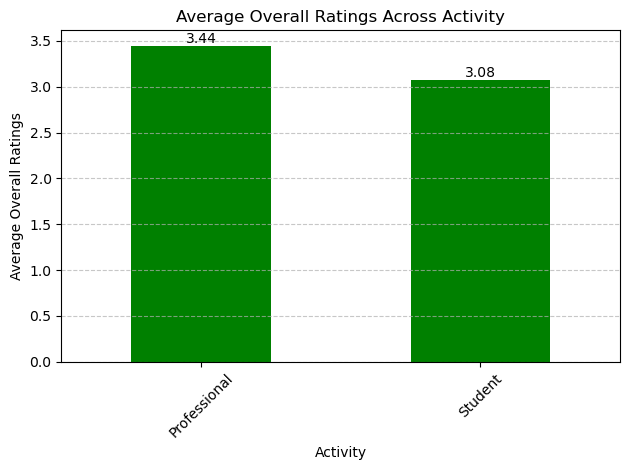

In [64]:
average_overall_rating_across_activity.plot(kind='bar', color='Green')

plt.xlabel('Activity')
plt.ylabel('Average Overall Ratings')
plt.title('Average Overall Ratings Across Activity')

y_pos = average_overall_rating_across_activity.values

for index, value in enumerate(average_overall_rating_across_activity):
    plt.text(index, y_pos[index], round(value, 2), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### 19) Visualizing how each location rates overall.

* To get a deeper understanding, we will now see how each location rates the store on average.
* We will group the data using the 'groupby' function, then use a barplot to visualize the data.

In [65]:
average_overall_rating_across_location = df.groupby(['Location'])['Overall Rating'].mean()

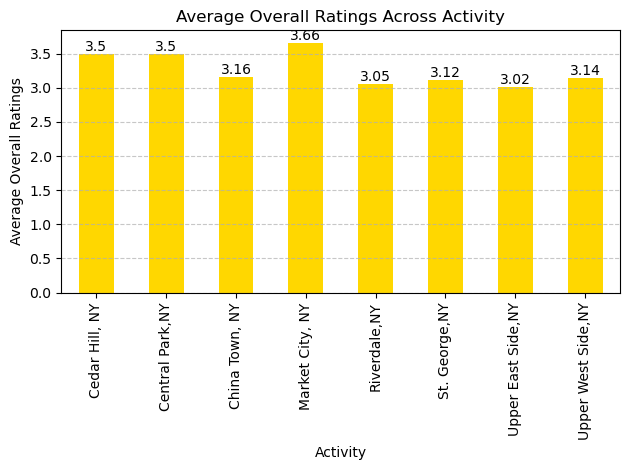

In [66]:
average_overall_rating_across_location.plot(kind='bar', color='Gold')

plt.xlabel('Activity')
plt.ylabel('Average Overall Ratings')
plt.title('Average Overall Ratings Across Activity')

y_pos = average_overall_rating_across_location.values

for index, value in enumerate(average_overall_rating_across_location):
    plt.text(index, y_pos[index], round(value, 2), ha='center', va='bottom')

plt.xticks(rotation=90)

plt.grid(linestyle='--', axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

## Insights

### Univariate Exploration
* People from 'Upper East Side, NY' have the highest visiting frequency. Maybe because the store is located in Upper East Side?
* Females visit the store more often.
* People born around the year 2000 visit the store more often. Maybe because the store is Gen-Z friendly?
* Single people visit more often, followed by married couples, then divorced couples.
* The average consumer is willing to spend around 300 USD to 500 USD at the store.
* Japanese Cuisine is the most popular, followed by Indian and Seafood at a close second, and Filipino on third.
* Among the consumers that visit the store, 44% do not consume alcohol. Maybe because the store does not serve alcohol and people want to enjoy a liquor-free place.
* Among the customers that visit the store, non-smokers and social-smokers take up around 71%, with regular smokers being around 29%. Maybe because the store has a no smoking policy.
* The Food Rating is distributed maximum between 3 to 5.
* The Service Rating is distributed unevenly. There are many people that give ratings as low as 1, and many people that give ratings as high as 5.
* The Overall Ratings is normally distributed.
* Only 13% of the customers visit the store often.

### Bivariate Exploration

* Females tend to give higher overall ratings across different cuisines on average as opposed to male customers.
* Consumers that drink socially tend to rate the store higher overall on average.
* Consumers that smoke often tend to rate the store higher overall on average.
* Divorcees give a higher overall rating on average.
* Professionals give a higher overall rating on average.
* Market City, NY gives the highest average overall ratings.
<br></br>
* Ideally, we can use these insights for marketing campaigns, discount provisions, expansion of cuisines, customer segmentation, etc.

## Writing to CSV for future use.

In [67]:
df.to_csv(r'E:\Learning Data Science With Python\Data Science 103 - Exploratory Data Analysis\Cuisine_Rating_Final.csv')